In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [5]:
df = pd.read_csv('/content/ADANIENT.NS.csv') # data_importing
df.head(10) # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-09-07,3435.800049,3487.949951,3406.100098,3473.750000,3470.278564,2188110
1,2022-09-08,3499.000000,3501.500000,3450.000000,3462.800049,3459.339600,1560414
2,2022-09-09,3479.000000,3507.949951,3415.149902,3451.199951,3447.750977,1614634
3,2022-09-12,3465.000000,3495.500000,3457.899902,3463.800049,3460.338623,1647756
4,2022-09-13,3478.000000,3568.899902,3421.300049,3555.800049,3552.246826,3479669
5,2022-09-14,3518.000000,3608.000000,3511.000000,3572.100098,3568.530273,2740337
6,2022-09-15,3590.000000,3767.949951,3575.000000,3748.699951,3744.953857,4716688
7,2022-09-16,3755.000000,3866.949951,3614.600098,3702.199951,3698.500244,5687429
8,2022-09-19,3718.949951,3801.949951,3680.750000,3778.649902,3774.873779,3092486
9,2022-09-20,3819.000000,3885.000000,3812.000000,3834.550049,3830.718262,3338704


In [6]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (250, 7)


In [7]:
# statistical description of data
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2764.035997,2813.992390,2695.622005,2751.925401,2749.615893,5.476735e+06
std,823.874388,818.786799,828.332345,823.605325,822.635956,6.244332e+06
min,1145.000000,1313.800049,1017.450012,1193.500000,1192.307251,0.000000e+00
25%,1939.950012,1995.000000,1881.737488,1925.137451,1923.213562,1.880455e+06
50%,2496.025024,2537.774902,2458.474976,2492.775024,2491.529297,3.349339e+06
75%,3582.625000,3628.450012,3522.250000,3579.449951,3575.873047,6.153784e+06
max,4175.000000,4190.000000,4066.399902,4165.299805,4161.137207,4.388558e+07


In [8]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [9]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,Open,Close
Date,,
2022-09-07,3435.800049,3473.750000
2022-09-08,3499.000000,3462.800049
2022-09-09,3479.000000,3451.199951
2022-09-12,3465.000000,3463.800049
2022-09-13,3478.000000,3555.800049
2022-09-14,3518.000000,3572.100098
2022-09-15,3590.000000,3748.699951
2022-09-16,3755.000000,3702.199951
2022-09-19,3718.949951,3778.649902


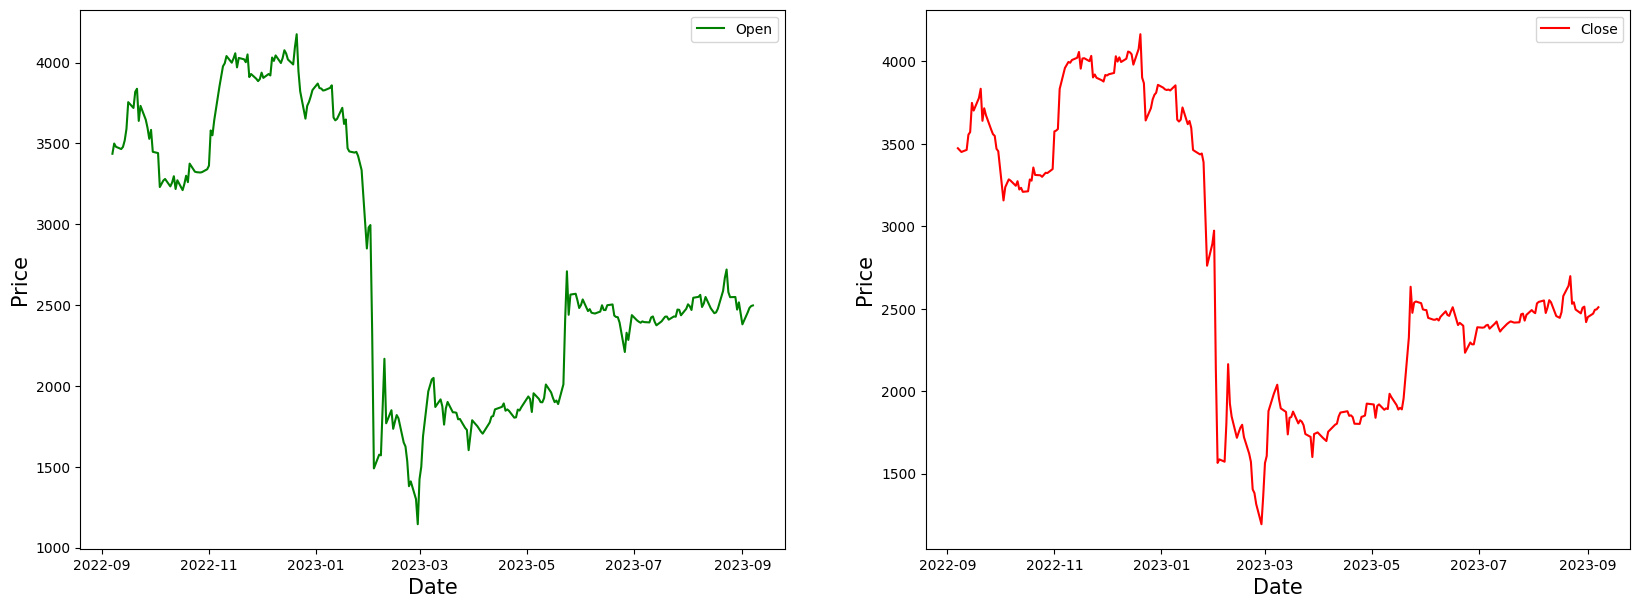

In [11]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [12]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2022-09-07,0.756040,0.767296
2022-09-08,0.776898,0.763611
2022-09-09,0.770297,0.759708
2022-09-12,0.765677,0.763948
2022-09-13,0.769967,0.794906
2022-09-14,0.783168,0.800390
2022-09-15,0.806931,0.859816
2022-09-16,0.861386,0.844169
2022-09-19,0.849488,0.869894


In [13]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

188

In [14]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((188, 2), (62, 2))

In [15]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [16]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((138, 50, 2), (138, 2), (12, 50, 2), (12, 2))

In [17]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [18]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
5/5 [==============================] - 7s 487ms/step - loss: 0.1856 - mean_absolute_error: 0.3399 - val_loss: 6.1247e-04 - val_mean_absolute_error: 0.0162
Epoch 2/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0454 - mean_absolute_error: 0.1473 - val_loss: 0.0213 - val_mean_absolute_error: 0.1383
Epoch 3/100
5/5 [==============================] - 0s 66ms/step - loss: 0.0294 - mean_absolute_error: 0.1156 - val_loss: 0.0010 - val_mean_absolute_error: 0.0256
Epoch 4/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0264 - mean_absolute_error: 0.1269 - val_loss: 0.0036 - val_mean_absolute_error: 0.0543
Epoch 5/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0231 - mean_absolute_error: 0.1174 - val_loss: 5.2311e-04 - val_mean_absolute_error: 0.0169
Epoch 6/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0176 - mean_absolute_error: 0.0882 - val_loss: 0.0033 - val_mean_absolute_error: 0.0471
Epoch 7/100
5/5 [==

In [19]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

1/1 [==============================] - 1s 1s/step


array([[0.4332235 , 0.40605846],
       [0.44056082, 0.4134261 ],
       [0.44252133, 0.41597572],
       [0.43982387, 0.41397637],
       [0.4347338 , 0.4093746 ]], dtype=float32)

In [20]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[2457.6672, 2400.2246],
       [2479.8992, 2422.1196],
       [2485.8396, 2429.6965],
       [2477.6663, 2423.755 ],
       [2462.2434, 2410.0793]], dtype=float32)

In [26]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-12:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-12:].index)], axis=1)

In [27]:
# Inversing normalization/scaling
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-08-23,2720.000000,2530.300049,2457.667236,2400.224609
2023-08-24,2580.000000,2539.550049,2479.899170,2422.119629
2023-08-25,2549.000000,2495.750000,2485.839600,2429.696533
2023-08-28,2550.000000,2472.449951,2477.666260,2423.754883
2023-08-29,2472.100098,2506.449951,2462.243408,2410.079346


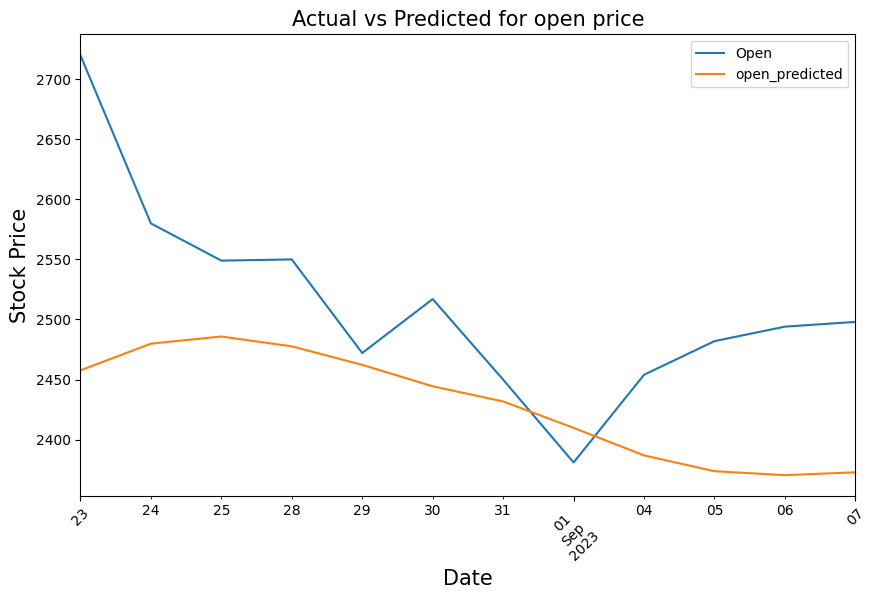

In [28]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

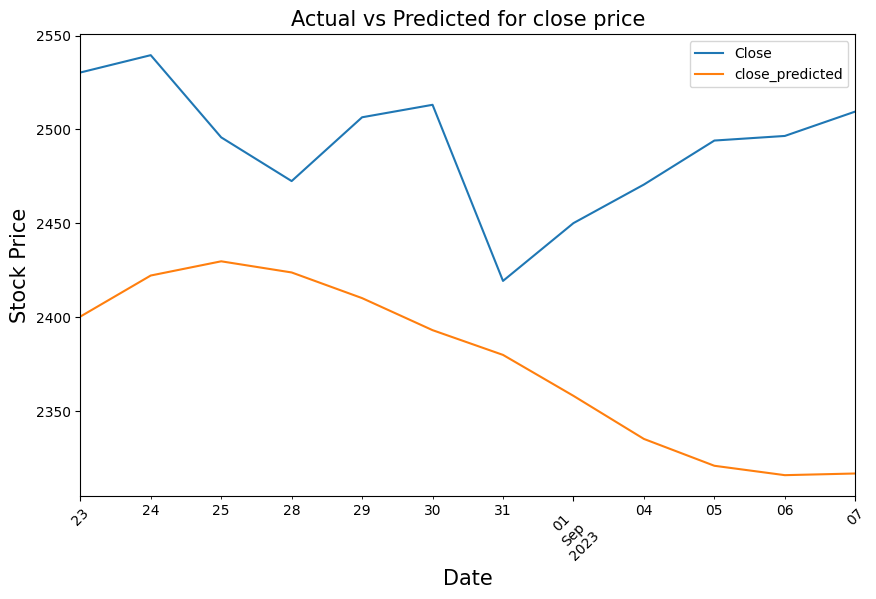

In [29]:
# plotting the actual close and predicted close prices on date index
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [32]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2023-09-05':'2023-09-20']

,Open,Close,open_predicted,close_predicted
2023-09-05,2482.000000,2494.050049,2373.730225,2320.738770
2023-09-06,2494.050049,2496.500000,2370.438232,2315.733643
2023-09-07,2498.000000,2509.500000,2372.816895,2316.620117
2023-09-08,NaN,NaN,NaN,NaN
2023-09-09,NaN,NaN,NaN,NaN
2023-09-10,NaN,NaN,NaN,NaN
2023-09-11,NaN,NaN,NaN,NaN
2023-09-12,NaN,NaN,NaN,NaN
2023-09-13,NaN,NaN,NaN,NaN
2023-09-14,NaN,NaN,NaN,NaN


In [33]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [34]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 30ms/step


In [35]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

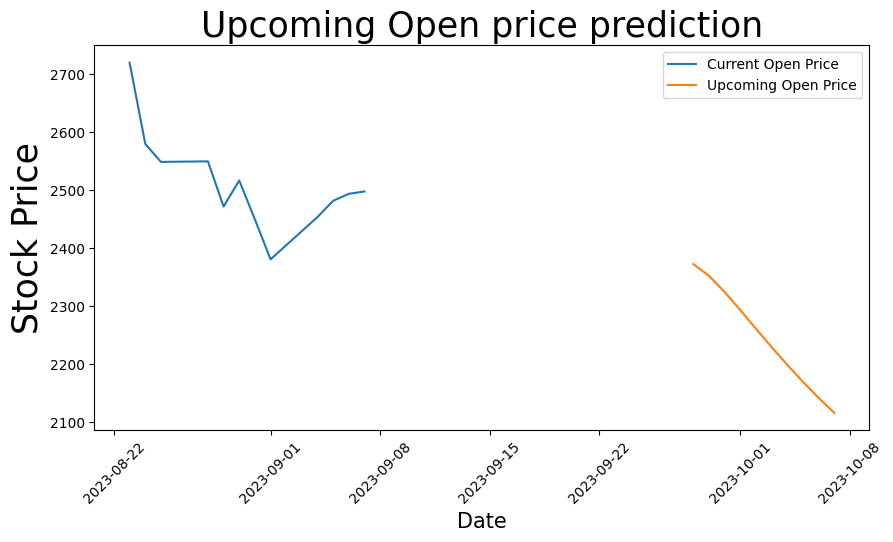

In [40]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=25)
ax.set_title('Upcoming Open price prediction',size=25)
ax.legend()
fig.show()

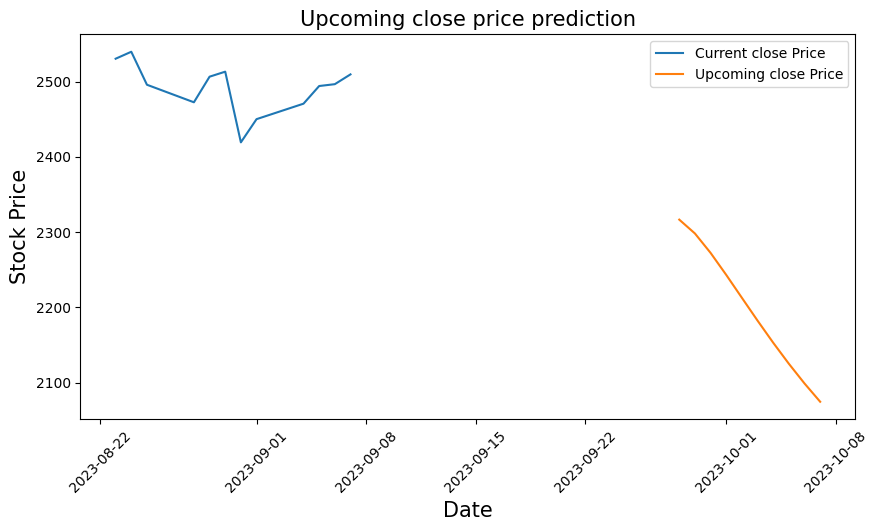

In [41]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-08-07':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2023-08-07':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()